In [1]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torch torchvision torchaudio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 157.1 kB/s eta 0:00:0000:0100:09
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 133.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 130.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 180.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 175.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 148.8 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
data_dir = "/Users/cengbosen/Desktop/lionfish"


In [18]:
import os
import random
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        data_dir = "/Users/cengbosen/Desktop/fish"
        self.data_dir = data_dir
        self.image_files = os.listdir(data_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_dir, self.image_files[idx])
        image = Image.open(image_path)

        # 裁剪为512x512
        image = image.resize((512, 512))

        # 随机旋转
        angle = random.randint(0, 360)
        rotated_image = image.rotate(angle)

        if self.transform:
            image = self.transform(image)
            rotated_image = self.transform(rotated_image)

        return image, rotated_image

# 定义图像变换
transform = transforms.Compose([
    transforms.ToTensor(),
    # 添加其他的预处理步骤，如标准化等
])

# 创建数据集
data_dir = "your_image_directory"
dataset = CustomDataset(data_dir, transform=transform)

# 创建数据加载器
batch_size = 16
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 遍历数据加载器
for batch in data_loader:
    images, rotated_images = batch
    # images 包含原始图像
    # rotated_images 包含旋转后的图像


In [20]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.8 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 856.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 1.2 MB/s eta 0:00:00ta 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


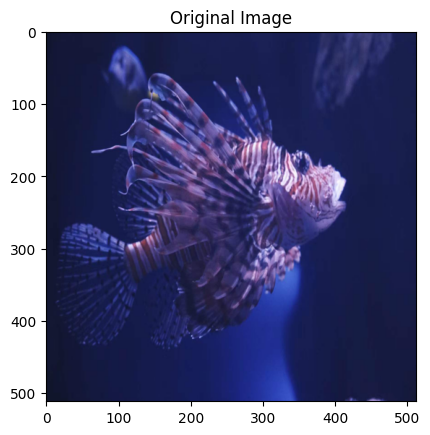

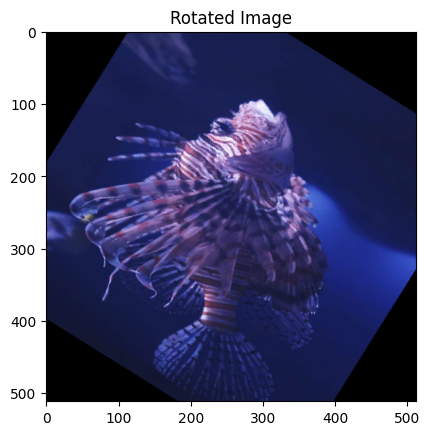

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [21]:
import matplotlib.pyplot as plt

# 遍历数据加载器
for batch in data_loader:
    images, rotated_images = batch
    for i in range(batch_size):
        original_image = images[i]
        rotated_image = rotated_images[i]

        # 显示原始图像
        plt.imshow(original_image.permute(1, 2, 0))  # 转换通道顺序
        plt.title("Original Image")
        plt.show()

        # 显示旋转后的图像
        plt.imshow(rotated_image.permute(1, 2, 0))  # 转换通道顺序
        plt.title("Rotated Image")
        plt.show()
